### Setting up a request to the DPLA API

This notebook grabs images from DPLA and feeds them through tensorflow's inception classifier.

The sane thing to do would be use the penultimate layer for transfer learning. But I'm curious, first off, whether the system works at all as is. Although the Imagenet set is a little weird (lots and lots of distinct species of animal), there will be pictures of most things in the DPLA. So we can search DPLA by imagenet term for things inception should be able to recognize, and then see if inception recognizes the thing that is there.

This is kind of a nice, truly out-of-sample set. 

I figured my way around the DPLA API using @lwrubel's notebook from github: you can still some of her code here: https://github.com/lwrubel/dplaplay. 

In [14]:
import requests
import sys
import tensorflow as tf
sys.path.append("/home/bschmidt/tensorflow/models/tutorials/image/imagenet")
import classify_image
import random

%load_ext autoreload
%autoreload 2
import numpy as np
import PIL.Image

config.py is a file that contains contains api key as dpla_api_key

In [1]:
from dplaimage.config import dpla_api_key

There's an object to handle queries. By default, it returns search results in a random order, which I find to be really important.

In [16]:
import dplaimage.Query

In [59]:
a = dplaimage.queries.Query()
a.set_date_range()

In [60]:
random_image = a.__iter__().next()

There are 2345580 results.


In [61]:
print random_image

{u'_id': u'mwdl--digcoll_uuu_11USHS_Shipler/7623', u'admin': {u'sourceResource': {u'title': u'Fred A. Carleson Car Dealer; Shipler Panorama #447'}, u'validation_message': u"[u'http://content.lib.utah.edu/utils/getthumbnail/collection/USHS_Shipler/id/7623', u'http://content.lib.utah.edu/utils/getthumbnail/collection/USHS_Shipler/id/7623'] is not of type 'string'", u'valid_after_enrich': False}, u'sourceResource': {u'isPartOf': u'Shipler Commercial Photographers', u'description': [u'Image shows a panoramic view of the Carleson automobile company storefront, used car lot, and adjacent Chevron station on Main Street.', u'Good condition.'], u'rights': u'Digital Image \xa9 2002 Utah State Historical Society. All Rights Reserved.', u'@id': u'http://dp.la/api/items/dc1c031e1bc21d75ffaacbbf8bf525af#sourceResource', u'temporal': [{u'begin': u'1949-06-08', u'end': u'1949-06-08', u'displayDate': u'8 June 1949'}], u'creator': [u'Shipler Commercial Photographers', u'Shipler, Harry'], u'collection': 

In [ ]:
And then one to handle images.

In [62]:
import dplaimage.images
image = dplaimage.images.Image(random_image)
image.display_in_ipython()

InvalidSchema: No connection adapters were found for '[u'http://content.lib.utah.edu/utils/getthumbnail/collection/USHS_Shipler/id/7623', u'http://content.lib.utah.edu/utils/getthumbnail/collection/USHS_Shipler/id/7623']'

## Tensorflow prep

In order to feed arbitrary image types into tensorflow, I

1. Use the response header to determine the file type, and save it to disk by the id.
2. Use the PIL library to load it in as a numpy matrix.
3. Convert to RGB if it's in two-channel black and white.
4. Feed it into a later point in the tensorflow graph (described [here](https://stackoverflow.com/questions/34484148/feeding-image-data-in-tensorflow-for-transfer-learning)).

In [56]:
import os


def cache_download(doc,prefix="downloads"):
    """
    Given a DPLA document record, return the file location if it's already been
    downloaded: otherwise, 
    """
    image = doc['object']
    identifier = doc['id']
    url = doc["object"]
    for suffix in ["png","jpg"]:
        p = "{}/{}.{}".format(prefix,identifier,suffix)
        if os.path.exists(p):
            return p
            
    print doc["object"]
    r = requests.get(url, stream = True)
    ftype = r.headers["Content-Type"]

    with open("{}/{}.{}".format(prefix,identifier,ftypes[ftype]), 'wb') as fd:
        for chunk in r.iter_content(400):
            fd.write(chunk)
    return "{}/{}.{}".format(prefix,identifier,ftypes[ftype])


def image_data(doc):
    image = PIL.Image.open(cache_download(doc))
    """
    prediction = sess.run(softmax_tensor, {'DecodeJpeg:0': image_array})
    """

    if len(np.array(image).shape) == 2:
        image = np.tile(np.expand_dims(np.array(image),2),3)

    image_array = np.array(image)[:, :, 0:3]  # Select RGB channels only.
    return image_array



Code from Google's Imagenet library, altered to work with black and white and multiple formats of input.

In [7]:
# Creates graph from saved GraphDef.

from argparse import Namespace

FLAGS = Namespace(
    model_dir = "/home/bschmidt/tensorflow/models/tutorials/image/imagenet/imagenet/"
)

classify_image.create_graph(FLAGS)
node_lookup = classify_image.NodeLookup(FLAGS = FLAGS)


Use an interactive session.

In [99]:

sess = tf.InteractiveSession()
# Some useful tensors:
# 'softmax:0': A tensor containing the normalized prediction across
#   1000 labels.
# 'pool_3:0': A tensor containing the next-to-last layer containing 2048
#   float description of the image.
# 'DecodeJpeg/contents:0': A tensor containing a string providing JPEG
#   encoding of the image.
# Runs the softmax tensor by feeding the image_data as input to the graph.
bottleneck = sess.graph.get_tensor_by_name('pool_3:0')
softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')


In [35]:

a = DPLA_Image(random_.next())
a.display_in_ipython()
_ = a.infer_imagenet_labels(sess)

[autoreload of dplaimage failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named Query
]


NameError: name 'DPLA_Image' is not defined

In [114]:
_ = a.infer_imagenet_labels(sess)

web site, website, internet site, site (score = 0.1716)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.0995)
comic book (score = 0.0454)
envelope (score = 0.0428)
binder, ring-binder (score = 0.0356)
jersey, T-shirt, tee shirt (score = 0.0226)
sweatshirt (score = 0.0217)


In [100]:
a.get_bottleneck_layer(sess)

NameError: global name 'image_array' is not defined

There are 2497530 results.


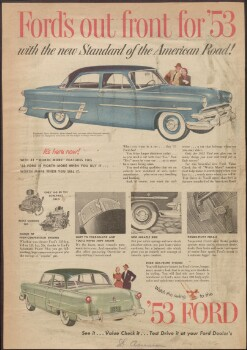

beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon (score = 0.3591)
web site, website, internet site, site (score = 0.1939)
comic book (score = 0.0584)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.0278)
minivan (score = 0.0152)
car wheel (score = 0.0129)
convertible (score = 0.0114)


[(0.35907421,
  'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon'),
 (0.19392698, 'web site, website, internet site, site'),
 (0.05843585, 'comic book'),
 (0.027844349, 'book jacket, dust cover, dust jacket, dust wrapper'),
 (0.015169095, 'minivan'),
 (0.012876519, 'car wheel'),
 (0.011355089, 'convertible')]

In [56]:
random_ = random_iterator()

a = DPLA_Image(random_.next())
a.display_in_ipython()
_ = a.infer_imagenet_labels()


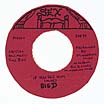

iPod (score = 0.2734)
puck, hockey puck (score = 0.0686)
face powder (score = 0.0648)
safety pin (score = 0.0192)
slide rule, slipstick (score = 0.0139)
neck brace (score = 0.0111)
web site, website, internet site, site (score = 0.0108)


In [78]:
a = DPLA_Image(random_.next())
a.display_in_ipython()
_ = a.infer_imagenet_labels()


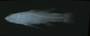

jellyfish (score = 0.4335)
screen, CRT screen (score = 0.0434)
matchstick (score = 0.0365)
isopod (score = 0.0349)
electric ray, crampfish, numbfish, torpedo (score = 0.0222)
syringe (score = 0.0154)
analog clock (score = 0.0096)


In [95]:
a = DPLA_Image(random_.next())
a.display_in_ipython()
_ = a.infer_imagenet_labels()


In [11]:
def predictions(image_array,n=7,verbose = True):
    # This is altered from the original code to take a numpy array of rgb channels, 
    # and to return an array.
    predictions = sess.run(softmax_tensor,
                       {'DecodeJpeg:0': image_array})
    predictions = np.squeeze(predictions)

    # Creates node ID --> English string lookup.

    top_k = predictions.argsort()[-n:][::-1]
    prediction_list = []
    for node_id in top_k:
        human_string = node_lookup.id_to_string(node_id)
        score = predictions[node_id]
        prediction_list.append((score,human_string))
        if verbose:
            print('%s (score = %.4f)' % (human_string, score))
    return prediction_list

In [12]:
def run_predictions(doc):
    """
    actually run the predictions
    """
   # doc = response["docs"][0]
    import IPython.core.display
    url = doc["object"]
    IPython.core.display.display(IPython.core.display.Image(url = url))
    predictions(image_data(doc))

def random_key():
    keys = [v for k,v in node_lookup.node_lookup.iteritems()]
    return random.choice(random.choice(keys).split(","))

def query_on_random_key(ask_for_evaluation = True):
    key = random_key()
    iterator = dpla_iterator(query, subject = key)
    try:
        nextup = iterator.next()
    except ValueError:
        print "No results for {}, trying again.".format(key)
        return query_on_random_key()
    print "Using {} as search term".format(key)
    
    predictions = run_predictions(nextup)
    if ask_for_evaluation:
        print raw_input("\nMANUAL EVALUATION\n")
        print "\n\n"


In [13]:
for i in range(5):
    query_on_random_key()

There are 91 results.
Using mosque as search term


http://digitallibrary.usc.edu/utils/getthumbnail/collection/p15799coll123/id/97491
mosque (score = 0.82676)
beacon, lighthouse, beacon light, pharos (score = 0.05753)
monastery (score = 0.01755)
castle (score = 0.00869)
pedestal, plinth, footstall (score = 0.00818)
palace (score = 0.00269)
prison, prison house (score = 0.00184)

MANUAL EVALUATION
Looks like a mosque to me! But I guess it's a monastery, based on the collection. Interesting mistake!
Looks like a mosque to me! But I guess it's a monastery, based on the collection. Interesting mistake!



There are 208 results.
Using grocery store as search term


http://americanart.si.edu/images/1983/1983.63.1375_1d.jpg
passenger car, coach, carriage (score = 0.20644)
steel drum (score = 0.05543)
espresso maker (score = 0.04094)
pool table, billiard table, snooker table (score = 0.04002)
grand piano, grand (score = 0.03327)
microwave, microwave oven (score = 0.02537)
barber chair (score = 0.02480)

MANUAL EVALUATION
Yeah, grocery stores are different nowadays
Yeah, grocery stores are different nowadays



There are 0 results.
No results for  daddy longlegs, trying again.
There are 697 results.
Using cliff as search term


http://cdm16694.contentdm.oclc.org/utils/getthumbnail/collection/p15281coll19/id/1675
fire screen, fireguard (score = 0.21378)
window shade (score = 0.12663)
window screen (score = 0.05437)
monastery (score = 0.04364)
shoji (score = 0.01493)
prison, prison house (score = 0.01435)
oscilloscope, scope, cathode-ray oscilloscope, CRO (score = 0.01309)

MANUAL EVALUATION
ImageNet doesn't know about stained glass, I guess?
ImageNet doesn't know about stained glass, I guess?



There are 0 results.
No results for sunscreen, trying again.
There are 101 results.
Using  sawmill as search term


https://thumbnails.calisphere.org/clip/150x150/eaf3ddcf05d085771c2679af44e811b1
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi (score = 0.58278)
thresher, thrasher, threshing machine (score = 0.13166)
tow truck, tow car, wrecker (score = 0.10390)
snowplow, snowplough (score = 0.01836)
lumbermill, sawmill (score = 0.01353)
moving van (score = 0.00526)
crane (score = 0.00504)

MANUAL EVALUATION
Yeah, I think this is a win.
Yeah, I think this is a win.



There are 0 results.
No results for  Cacatua galerita, trying again.
There are 0 results.
No results for  Salamandra salamandra, trying again.
There are 0 results.
No results for Scotch terrier, trying again.
There are 0 results.
No results for airliner, trying again.
There are 0 results.
No results for  hammerhead shark, trying again.
There are 12 results.
Using meat loaf as search term


https://thumbnails.calisphere.org/clip/150x150/a17ad58373cf1ea29c9dc0839d60f011
cleaver, meat cleaver, chopper (score = 0.86227)
wok (score = 0.03729)
dough (score = 0.02302)
tobacco shop, tobacconist shop, tobacconist (score = 0.01001)
potter's wheel (score = 0.00852)
spatula (score = 0.00654)
hatchet (score = 0.00345)

MANUAL EVALUATION
I mean, fascinating that it gets to meat cleaver *instead* of dough.
I mean, fascinating that it gets to meat cleaver *instead* of dough.





In [13]:
for i in range(5):
    query_on_random_key()

There are 26 results.
Using  Cebus capucinus as search term


http://collections.nmnh.si.edu/media/?irn=10393840&thumb=yes
digital clock (score = 0.13414)
nematode, nematode worm, roundworm (score = 0.09512)
matchstick (score = 0.08165)
jack-o'-lantern (score = 0.07624)
spotlight, spot (score = 0.03178)
candle, taper, wax light (score = 0.02272)
theater curtain, theatre curtain (score = 0.01670)

MANUAL EVALUATION
Wrong. The classifier seems to be a little thrown by the type of image we're seeing here.
Wrong. The classifier seems to be a little thrown by the type of image we're seeing here.



There are 0 results.
No results for head cabbage, trying again.
There are 0 results.
No results for grey whale, trying again.
There are 49 results.
Using bookcase as search term


http://npg.si.edu/media/192X192/9100356C_1.jpg
bow tie, bow-tie, bowtie (score = 0.50121)
barbershop (score = 0.19904)
wall clock (score = 0.03428)
barber chair (score = 0.02932)
groom, bridegroom (score = 0.01816)
barometer (score = 0.01531)
suit, suit of clothes (score = 0.01060)

MANUAL EVALUATION
Amazing. This man is indeed wearing a bow tie, though you can't tell it from the image resolution here; it seems like there's just something tweedy about the surroundings.
Amazing. This man is indeed wearing a bow tie, though you can't tell it from the image resolution here; it seems like there's just something tweedy about the surroundings.



There are 0 results.
No results for wallaby, trying again.
There are 9 results.
Using ram as search term


https://thumbnails.calisphere.org/clip/150x150/84543c4106a4ce1f6a61c66636cea65d
jinrikisha, ricksha, rickshaw (score = 0.08664)
mobile home, manufactured home (score = 0.05750)
maze, labyrinth (score = 0.04366)
planetarium (score = 0.04313)
park bench (score = 0.03689)
airship, dirigible (score = 0.02681)
bannister, banister, balustrade, balusters, handrail (score = 0.02647)

MANUAL EVALUATION
Not a ram, that's for sure... Rickshaw isn't a terrible guess. But who knows.
Not a ram, that's for sure... Rickshaw isn't a terrible guess. But who knows.



There are 146 results.
Using umbrella as search term


http://digitallibrary.usc.edu/utils/getthumbnail/collection/p15799coll123/id/47216
thresher, thrasher, threshing machine (score = 0.31130)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.06515)
seashore, coast, seacoast, sea-coast (score = 0.04749)
lakeside, lakeshore (score = 0.04743)
tobacco shop, tobacconist shop, tobacconist (score = 0.03916)
mobile home, manufactured home (score = 0.03445)
worm fence, snake fence, snake-rail fence, Virginia fence (score = 0.03123)

MANUAL EVALUATION
Extremely wrong
Extremely wrong



There are 0 results.
No results for French loaf, trying again.
There are 44 results.
Using  bullet as search term


http://npg.si.edu/media/pa_03_6_1.jpg
Band Aid (score = 0.68960)
sweatshirt (score = 0.02330)
mask (score = 0.01638)
seat belt, seatbelt (score = 0.00891)
buckle (score = 0.00869)
ice lolly, lolly, lollipop, popsicle (score = 0.00716)
ski mask (score = 0.00621)

MANUAL EVALUATION
First off, wow: that image is pretty shocking.
First off, wow: that image is pretty shocking.





In [14]:
for i in range(5):
    query_on_random_key()

There are 0 results.
No results for  hyaena, trying again.
There are 0 results.
No results for jigsaw puzzle, trying again.
There are 0 results.
No results for bulletproof vest, trying again.
There are 0 results.
No results for cliff dwelling, trying again.
There are 11 results.
Using birdhouse as search term


http://americanart.si.edu/images/1983/1983.63.1824_1d.jpg
maillot, tank suit (score = 0.08691)
steel drum (score = 0.07802)
marimba, xylophone (score = 0.04214)
bicycle-built-for-two, tandem bicycle, tandem (score = 0.03247)
stage (score = 0.02857)
sarong (score = 0.02339)
acoustic guitar (score = 0.01753)

MANUAL EVALUATION
Not a tank suit, but also not recognizable as a birdhouse.
Not a tank suit, but also not recognizable as a birdhouse.



There are 8 results.
Using poncho as search term


AttributeError: 'list' object has no attribute 'split'

In [322]:
for i in range(5):
    query_on_random_key()

There are 412 results.
Using  horn as search term


http://collections.nmnh.si.edu/media/?irn=11354247&thumb=yes
web site, website, internet site, site (score = 0.23723)
binder, ring-binder (score = 0.14296)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.07848)
fire screen, fireguard (score = 0.04599)
laptop, laptop computer (score = 0.03670)
wall clock (score = 0.03351)
screen, CRT screen (score = 0.02629)

MANUAL EVALUATION
Totally wrong, but isn't DPLA wrong too?
Totally wrong, but isn't DPLA wrong too?



There are 0 results.
No results for  hyena dog, trying again.
There are 0 results.
No results for head cabbage, trying again.
There are 11 results.
Using rocking chair as search term


http://npg.si.edu/media/8000754C_1.jpg
rocking chair, rocker (score = 0.43317)
barrow, garden cart, lawn cart, wheelbarrow (score = 0.24201)
tricycle, trike, velocipede (score = 0.07513)
swing (score = 0.04224)
cello, violoncello (score = 0.01204)
park bench (score = 0.01108)
folding chair (score = 0.00675)

MANUAL EVALUATION
Correct! And with high file size, so maybe we need more of that.
Correct! And with high file size, so maybe we need more of that.



There are 2 results.
Using toucan as search term


http://digital.lib.utk.edu/collections/islandora/object/heilman%3A992/datastream/TN/view
binder, ring-binder (score = 0.14226)
packet (score = 0.12937)
fire screen, fireguard (score = 0.09914)
velvet (score = 0.06068)
lampshade, lamp shade (score = 0.05751)
table lamp (score = 0.03630)
screen, CRT screen (score = 0.02444)

MANUAL EVALUATION
What a weird mistake. But is that a toucan?
What a weird mistake. But is that a toucan?



There are 0 results.
No results for combination lock, trying again.
There are 0 results.
No results for  anole, trying again.
There are 65 results.
Using swing as search term


https://thumbnails.calisphere.org/clip/150x150/cda2e460d3a0e485ed3fbee99b513477
prison, prison house (score = 0.24451)
cassette (score = 0.17558)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.06776)
shopping basket (score = 0.03140)
passenger car, coach, carriage (score = 0.02466)
scoreboard (score = 0.01801)
fire screen, fireguard (score = 0.01488)

MANUAL EVALUATION
This poor child! It is a swing, but we're seeing prison from: the black and white?\nThe bars of the negative?
This poor child! It is a swing, but we're seeing prison from: the black and white?\nThe bars of the negative?



There are 26 results.
Using fur coat as search term


http://npg.si.edu/media/192X192/A7000484B.jpg
book jacket, dust cover, dust jacket, dust wrapper (score = 0.84187)
web site, website, internet site, site (score = 0.03595)
comic book (score = 0.00829)
fur coat (score = 0.00821)
cloak (score = 0.00781)
grand piano, grand (score = 0.00465)
abaya (score = 0.00359)

MANUAL EVALUATION
It sorta notices the fur coat, but the letters over the top makes it convinced it has to be some kind of media. (Multiple assignment is not possible here, remember).
It sorta notices the fur coat, but the letters over the top makes it convinced it has to be some kind of media. (Multiple assignment is not possible here, remember).





In [324]:
for i in range(5):
    query_on_random_key()

There are 128 results.
Using badger as search term


http://collections.nmnh.si.edu/media/?irn=38723&thumb=yes
slide rule, slipstick (score = 0.51586)
oboe, hautboy, hautbois (score = 0.04763)
flute, transverse flute (score = 0.02599)
menu (score = 0.01378)
binder, ring-binder (score = 0.01126)
bassoon (score = 0.00934)
web site, website, internet site, site (score = 0.00901)

MANUAL EVALUATION
OK, that's not a badger, that's like an index card. But why would it be listed as a slide rule?
OK, that's not a badger, that's like an index card. But why would it be listed as a slide rule?



There are 23 results.
Using  white shark as search term


https://thumbnails.calisphere.org/clip/150x150/49bc9b4295e07fc8e1bd72e59abfe157
stretcher (score = 0.72098)
bobsled, bobsleigh, bob (score = 0.02305)
ox (score = 0.01891)
balance beam, beam (score = 0.01118)
sea lion (score = 0.00984)
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias (score = 0.00831)
lumbermill, sawmill (score = 0.00752)

MANUAL EVALUATION
I mean, it's supine, and low down in the results it tosses a guess at Great White Shark, but this isn't great.
I mean, it's supine, and low down in the results it tosses a guess at Great White Shark, but this isn't great.



There are 4 results.
Using shopping basket as search term


https://thumbnails.calisphere.org/clip/150x150/00ff626191caa4af5544fabaa2fafd24
cannon (score = 0.13236)
tank, army tank, armored combat vehicle, armoured combat vehicle (score = 0.10416)
breakwater, groin, groyne, mole, bulwark, seawall, jetty (score = 0.08406)
thresher, thrasher, threshing machine (score = 0.05975)
hay (score = 0.03682)
tractor (score = 0.03462)
worm fence, snake fence, snake-rail fence, Virginia fence (score = 0.02271)

MANUAL EVALUATION
Nobody wins on this one.
Nobody wins on this one.



There are 0 results.
No results for sea snake, trying again.
There are 7 results.
Using  trolley car as search term


https://thumbnails.calisphere.org/clip/150x150/1bfe69efe793e384567291350141d71a
book jacket, dust cover, dust jacket, dust wrapper (score = 0.13684)
rule, ruler (score = 0.10964)
fireboat (score = 0.06510)
screen, CRT screen (score = 0.04866)
container ship, containership, container vessel (score = 0.03920)
fountain (score = 0.03520)
monitor (score = 0.02634)

MANUAL EVALUATION
Book jacket and ruler are both common results when there's a border. Some pre-cropping might be good here.
Book jacket and ruler are both common results when there's a border. Some pre-cropping might be good here.



There are 4960 results.
Using television as search term


http://credo.library.umass.edu/images/resize/300x300/mums834-b002-f26-i015-001.png
cowboy boot (score = 0.18367)
miniskirt, mini (score = 0.07054)
sock (score = 0.06981)
fur coat (score = 0.04957)
park bench (score = 0.03653)
crutch (score = 0.02502)
curly-coated retriever (score = 0.02416)

MANUAL EVALUATION
That is not a picture of a television. It seems to see that these are people in clothes, and throw random guesses about the kind of clothing they're wearing
That is not a picture of a television. It seems to see that these are people in clothes, and throw random guesses about the kind of clothing they're wearing





In [325]:
for i in range(5):
    query_on_random_key()

There are 3 results.
Using mongoose as search term


http://digicoll.library.wisc.edu/Primate/data/images/MmBib/PCLArts/PCLA2000/thumb/PCLA1931t.jpg
fox squirrel, eastern fox squirrel, Sciurus niger (score = 0.94318)
indri, indris, Indri indri, Indri brevicaudatus (score = 0.01302)
mousetrap (score = 0.01218)
Madagascar cat, ring-tailed lemur, Lemur catta (score = 0.00364)
grey fox, gray fox, Urocyon cinereoargenteus (score = 0.00335)
triceratops (score = 0.00230)
mink (score = 0.00114)

MANUAL EVALUATION
This should be easy, but is quite wrong! The tree branch must be confusing it?
This should be easy, but is quite wrong! The tree branch must be confusing it?



There are 5 results.
Using window screen as search term


https://thumbnails.calisphere.org/clip/150x150/16ef5e9789f57b96b6ccea432273d352
beaker (score = 0.10505)
hourglass (score = 0.07387)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.05974)
dishwasher, dish washer, dishwashing machine (score = 0.05239)
vending machine (score = 0.04815)
screen, CRT screen (score = 0.04145)
television, television system (score = 0.03500)

MANUAL EVALUATION
Who knows. Junk all around.
Who knows. Junk all around.



There are 106 results.
Using balloon as search term


https://texashistory.unt.edu/ark:/67531/metapth301985/thumbnail/
home theater, home theatre (score = 0.28710)
television, television system (score = 0.26845)
screen, CRT screen (score = 0.23062)
entertainment center (score = 0.04646)
monitor (score = 0.02613)
theater curtain, theatre curtain (score = 0.01382)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.00638)

MANUAL EVALUATION
Error!
Error!



There are 0 results.
No results for Bernese mountain dog, trying again.
There are 0 results.
No results for  sand viper, trying again.
There are 57 results.
Using dough as search term


http://dlg.galileo.usg.edu/gcfa/gtaa/do-th:gtaa87-78-0000009
spatula (score = 0.08786)
restaurant, eating house, eating place, eatery (score = 0.03052)
library (score = 0.02525)
solar dish, solar collector, solar furnace (score = 0.02474)
desk (score = 0.01928)
stove (score = 0.01880)
plane, carpenter's plane, woodworking plane (score = 0.01452)

MANUAL EVALUATION
Kind of. There is a spatula there.
Kind of. There is a spatula there.



There are 0 results.
No results for  transverse flute, trying again.
There are 8 results.
Using china cabinet as search term


https://thumbnails.calisphere.org/clip/150x150/b000a7c6cda9ca1c14051fededccb346
monitor (score = 0.20778)
screen, CRT screen (score = 0.18870)
desktop computer (score = 0.11870)
web site, website, internet site, site (score = 0.09812)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.04986)
hand-held computer, hand-held microcomputer (score = 0.03137)
medicine chest, medicine cabinet (score = 0.02755)

MANUAL EVALUATION
Monitor for the thing with a frame, again.
Monitor for the thing with a frame, again.





In [326]:
for i in range(5):
    query_on_random_key()
    

There are 2 results.
Using chickadee as search term


https://texashistory.unt.edu/ark:/67531/metapth240236/thumbnail/
tobacco shop, tobacconist shop, tobacconist (score = 0.16683)
scoreboard (score = 0.06820)
dogsled, dog sled, dog sleigh (score = 0.05811)
redbone (score = 0.05671)
Arabian camel, dromedary, Camelus dromedarius (score = 0.03682)
container ship, containership, container vessel (score = 0.03557)
English foxhound (score = 0.03187)

MANUAL EVALUATION
God, these subject headings are more comical than  the neural network's mistakes. I gues the name of the horse is BB Chickadee. Hard to believe anyone's about to search on that.
God, these subject headings are more comical than  the neural network's mistakes. I gues the name of the horse is BB Chickadee. Hard to believe anyone's about to search on that.



There are 74 results.
Using ear as search term


http://fdlp.gov/images/gpo-tn.jpg
sunscreen, sunblock, sun blocker (score = 0.12094)
hair spray (score = 0.04807)
web site, website, internet site, site (score = 0.04515)
police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria (score = 0.02800)
tobacco shop, tobacconist shop, tobacconist (score = 0.02384)
ski (score = 0.01377)
stopwatch, stop watch (score = 0.01277)

MANUAL EVALUATION
Thanks, GPO!
Thanks, GPO!



There are 0 results.
No results for  mollymawk, trying again.
There are 0 results.
No results for redbone, trying again.
There are 56 results.
Using passenger car as search term


http://content.mpl.org/utils/getthumbnail/collection/MilwWaterwa/id/121
submarine, pigboat, sub, U-boat (score = 0.69006)
dock, dockage, docking facility (score = 0.10453)
aircraft carrier, carrier, flattop, attack aircraft carrier (score = 0.06153)
liner, ocean liner (score = 0.00965)
drilling platform, offshore rig (score = 0.00883)
lakeside, lakeshore (score = 0.00819)
boathouse (score = 0.00772)

MANUAL EVALUATION
So somehow "passenger car" is returning for "passenger ship." VThis is a clipper ship, something Imagenet probably doesn't know about: hence the submarine misidentification
So somehow "passenger car" is returning for "passenger ship." VThis is a clipper ship, something Imagenet probably doesn't know about: hence the submarine misidentification



There are 0 results.
No results for  dustbin, trying again.
There are 0 results.
No results for French loaf, trying again.
There are 36 results.
Using  ai as search term


http://collections.nmnh.si.edu/media/?irn=10305231&thumb=yes
screen, CRT screen (score = 0.54510)
hand-held computer, hand-held microcomputer (score = 0.08288)
web site, website, internet site, site (score = 0.07677)
desktop computer (score = 0.05594)
television, television system (score = 0.03158)
home theater, home theatre (score = 0.02675)
laptop, laptop computer (score = 0.02242)

MANUAL EVALUATION
I've seen it guess ruler on these ones with the siderules.
I've seen it guess ruler on these ones with the siderules.



There are 0 results.
No results for green snake, trying again.
There are 3 results.
Using agama as search term


http://collections.nmnh.si.edu/media/?irn=11476378&thumb=yes
web site, website, internet site, site (score = 0.29350)
lotion (score = 0.09780)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.06869)
binder, ring-binder (score = 0.05437)
fire screen, fireguard (score = 0.03514)
safety pin (score = 0.02216)
screen, CRT screen (score = 0.02055)

MANUAL EVALUATION
Again, printed material is a total wash.
Again, printed material is a total wash.





In [ ]:
def subjects(response):
    for doc in response['docs']:
        subjects = doc['sourceResource']['subject']
        print subjects
        for subject in subjects:
            print "name: ", subject['name']
    

In [ ]:
def thumbnail(response):
    for doc in response['docs']:
        image = doc['object']
        identifier = doc['id']
        print image, identifier
    

In [ ]:
spatial(response)

In [ ]:
formats(response)

In [ ]:
subjects(response)

In [ ]:
thumbnail(response)

In [ ]:
display(Image(url="http://ark.digitalcommonwealth.org/ark:/50959/pk02ct663/thumbnail"))
display(Image(url="https://fedora.digitalcommonwealth.org/fedofdra/objects/commonwealth:pk02ct67c/datastreams/access800/content"))



In [ ]:
import shutil
url = "http://ark.digitalcommonwealth.org/ark:/50959/pk02ct663/thumbnail"
r = requests.get("http://ark.digitalcommonwealth.org/ark:/50959/pk02ct663/thumbnail", stream=True)
if r.status_code == 200:
    with open(path, 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f) 

In [ ]:
Image(url=url)